# Goal 

Build one or more regression models to determine the scores for each team using the other columns as features

Predict the scores, predict the outcome of the game 

Do feature engineering. Build a few regression models. 

#### Citing Sources 

Along with the sources I sprinkled in, I used these sources below throughout the text to better attack this problem. 

https://towardsdatascience.com/how-to-improve-sports-betting-odds-step-by-step-guide-in-python-94626b852f45

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('~/Documents/EECS/EECS_731/HW/EECS731_4/data/nfl_games.csv')

I added the difference in score to see if that could introduce a relationship. 

In [3]:
data['score_diff'] = (data['score1'] - data['score2'])

In [4]:
data['team1_win'] = np.where(data['score_diff'] > 0, 1, 0)
data['team2_win'] = np.where(data['score_diff'] < 0, 1, 0)

In [5]:
#data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['elo_diff'] = (data['elo1'] - data['elo2'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16274 entries, 0 to 16273
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        16274 non-null  object 
 1   season      16274 non-null  int64  
 2   neutral     16274 non-null  int64  
 3   playoff     16274 non-null  int64  
 4   team1       16274 non-null  object 
 5   team2       16274 non-null  object 
 6   elo1        16274 non-null  float64
 7   elo2        16274 non-null  float64
 8   elo_prob1   16274 non-null  float64
 9   score1      16274 non-null  int64  
 10  score2      16274 non-null  int64  
 11  result1     16274 non-null  float64
 12  score_diff  16274 non-null  int64  
 13  team1_win   16274 non-null  int64  
 14  team2_win   16274 non-null  int64  
 15  elo_diff    16274 non-null  float64
dtypes: float64(5), int64(8), object(3)
memory usage: 2.0+ MB


In [7]:
data = data.dropna()

In [8]:
data.describe()

,season,neutral,playoff,elo1,elo2,elo_prob1,score1,score2,result1,score_diff,team1_win,team2_win,elo_diff
count,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000,16274.000000
mean,1982.437569,0.005223,0.034779,1502.458394,1498.918375,0.584829,21.544058,18.578161,0.580681,2.965897,0.571034,0.409672,3.540020
std,25.448049,0.072084,0.183226,105.015371,104.541271,0.175302,11.289422,10.794566,0.488551,15.469792,0.494944,0.491788,141.791884
min,1920.000000,0.000000,0.000000,1119.595000,1156.551000,0.070953,0.000000,0.000000,0.000000,-73.000000,0.000000,0.000000,-511.826000
25%,1967.000000,0.000000,0.000000,1429.242750,1425.864750,0.461231,14.000000,10.000000,0.000000,-7.000000,0.000000,0.000000,-91.493250
50%,1987.000000,0.000000,0.000000,1504.015000,1500.185000,0.596354,21.000000,17.000000,1.000000,3.000000,1.000000,0.000000,3.203000
75%,2003.000000,0.000000,0.000000,1578.071500,1575.753000,0.719930,28.000000,26.000000,1.000000,13.000000,1.000000,1.000000,99.353500
max,2018.000000,1.000000,1.000000,1839.663000,1849.484000,0.970516,72.000000,73.000000,1.000000,66.000000,1.000000,1.000000,541.969000


There are 16,274 entries. The first season starting in 1920. I agree that some teams that were good in 1920 might still be good today, but I think I will only take into account the last 15 years. So I will drop any game before the 2005 season. 

In [9]:
data = data[data['season'] >= 2005] 

In [10]:
data.head(5)

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1,score_diff,team1_win,team2_win,elo_diff
12536,2005-09-08,2005,0,0,NE,OAK,1712.670,1403.871,0.895833,30,20,1.0,10,1,0,308.799
12537,2005-09-11,2005,0,0,CAR,NO,1530.111,1506.978,0.624181,20,23,0.0,-3,0,1,23.133
12538,2005-09-11,2005,0,0,KC,NYJ,1533.474,1547.067,0.573445,27,7,1.0,20,1,0,-13.593
12539,2005-09-11,2005,0,0,JAX,SEA,1485.276,1480.542,0.599029,26,14,1.0,12,1,0,4.734
12540,2005-09-11,2005,0,0,WSH,CHI,1459.026,1410.741,0.657488,9,7,1.0,2,1,0,48.285


In [11]:
data.team1.unique()

array(['NE', 'CAR', 'KC', 'JAX', 'WSH', 'SF', 'CLE', 'BUF', 'LAC', 'MIN',
       'MIA', 'DET', 'PIT', 'BAL', 'NYG', 'ATL', 'CIN', 'TB', 'TEN',
       'OAK', 'CHI', 'NYJ', 'DEN', 'HOU', 'GB', 'IND', 'ARI', 'SEA',
       'PHI', 'DAL', 'LAR', 'NO'], dtype=object)

By dropping games before 2005, I now have a better idea of what teams are currently active. 

# Faceting 

I decided to try faceting to better understand the data. 

Tips for faceting I found at https://www.kaggle.com/residentmario/faceting-with-seaborn

I was interested in comparing scores and the teams that played. 

In [12]:
import seaborn as sns 

In [13]:
# data2010 = data[data['season'].isin(['2010'])]

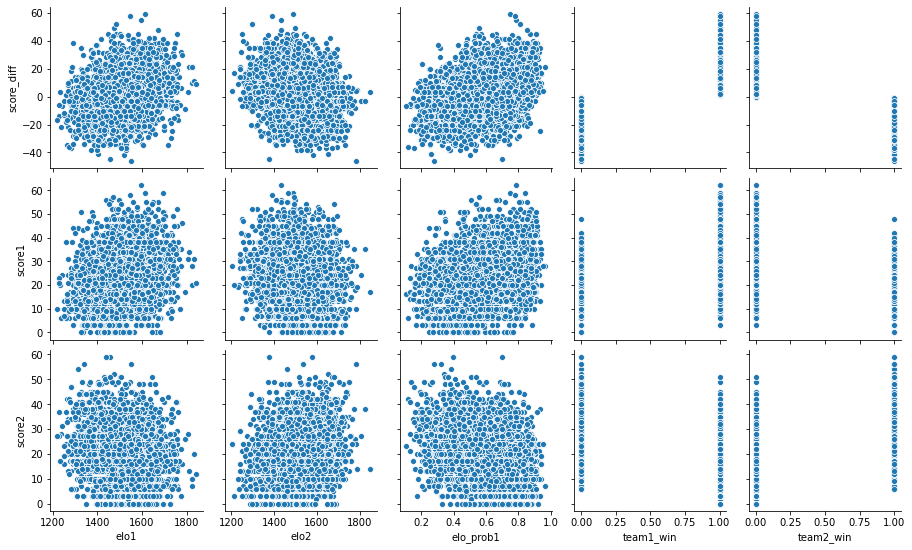

In [14]:
sns.pairplot(data,
             x_vars = ['elo1', 'elo2', 'elo_prob1', 'team1_win', 'team2_win'],
             y_vars = ['score_diff', 'score1', 'score2'])
             #hue = "team1")

It looks like there may be a linear correlation with score1 and elo1 and score2 and elo2. Although that seems intuitive. 

I didn't see any great correlations to use. So, I moved onto a heat map. The closer to 1 or -1 the value is on the map, the stronger the corelation. There isn't a great correlation between anything except maybe elo_prob1 and result_1. That seems like the highest non-trival value. 

In [15]:
data_corr = data.corr()
data_corr

,season,neutral,playoff,elo1,elo2,elo_prob1,score1,score2,result1,score_diff,team1_win,team2_win,elo_diff
season,1.000000e+00,0.028296,-5.931427e-19,0.007367,0.005822,0.002189,0.061749,0.064174,0.009271,-0.000119,0.007715,-0.010808,0.001163
neutral,2.829635e-02,1.000000,1.499114e-01,0.041492,0.036028,-0.049735,0.001141,0.002981,0.003245,-0.001217,0.000999,-0.005485,0.004179
playoff,-5.931427e-19,0.149911,1.000000e+00,0.264268,0.241292,0.017899,0.030295,0.007698,0.017842,0.016032,0.018265,-0.017380,0.017955
elo1,7.366663e-03,0.041492,2.642684e-01,1.000000,0.074469,0.675980,0.250805,-0.153109,0.237555,0.279407,0.237385,-0.237205,0.682533
elo2,5.821616e-03,0.036028,2.412920e-01,0.074469,1.000000,-0.673994,-0.124768,0.219881,-0.209652,-0.236212,-0.209955,0.208890,-0.677998
elo_prob1,2.189256e-03,-0.049735,1.789909e-02,0.675980,-0.673994,1.000000,0.275833,-0.271637,0.327205,0.377132,0.327480,-0.326215,0.992235
score1,6.174932e-02,0.001141,3.029494e-02,0.250805,-0.124768,0.275833,1.000000,-0.053653,0.557326,0.737383,0.556660,-0.556774,0.276312
score2,6.417428e-02,0.002981,7.697921e-03,-0.153109,0.219881,-0.271637,-0.053653,1.000000,-0.571707,-0.714065,-0.571322,0.570843,-0.274007
result1,9.271437e-03,0.003245,1.784226e-02,0.237555,-0.209652,0.327205,0.557326,-0.571707,1.000000,0.777466,0.998908,-0.998907,0.328756
score_diff,-1.188288e-04,-0.001217,1.603222e-02,0.279407,-0.236212,0.377132,0.737383,-0.714065,0.777466,1.000000,0.776739,-0.776495,0.379071


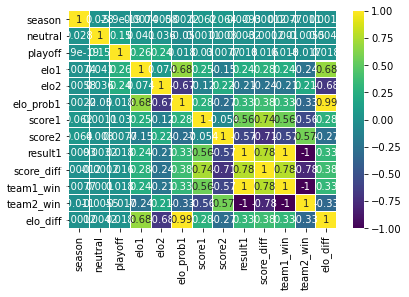

In [16]:
sns.heatmap(data_corr, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [17]:
import matplotlib.pyplot as plt

def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points histogram - whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

I thought maybe a histogram would help to look at the distrbution of the values for the difference in score. This revealed there were no crazy outliers.

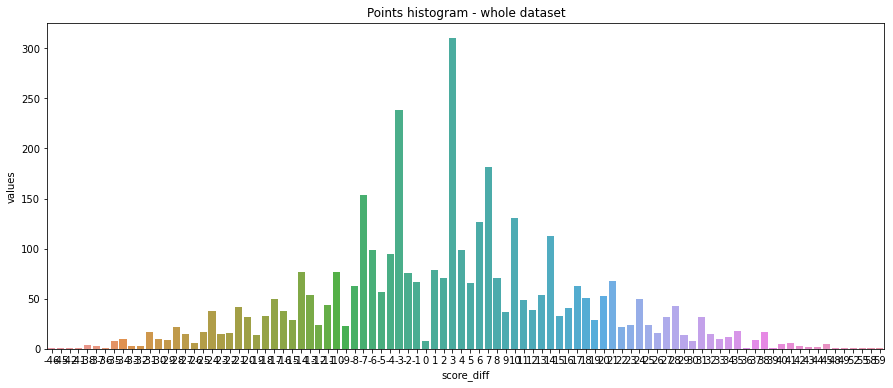

In [18]:
temp = data['score_diff'].value_counts()
df = pd.DataFrame({'score_diff': temp.index,
                   'values': temp.values
                  })

pastel_plot(df,'score_diff', 'values')

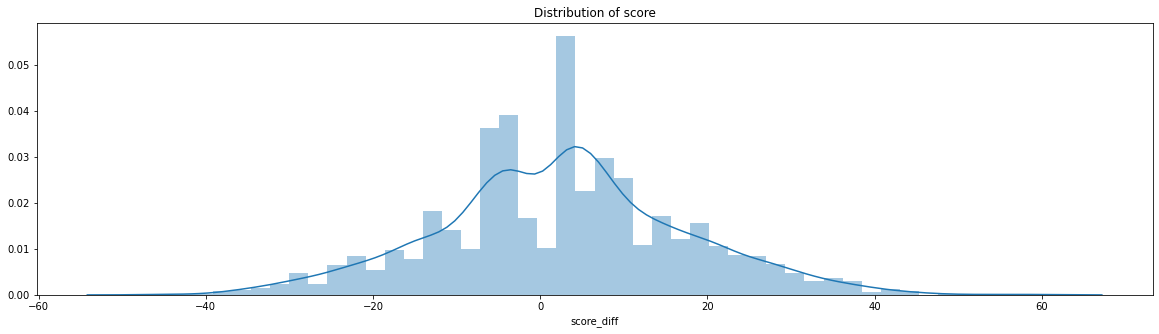

In [19]:
plt.figure(figsize=(20,5))
plt.title("Distribution of score")
ax = sns.distplot(data["score_diff"])

In [20]:
data=data.sort_values('score_diff', ascending=False)

The following bar graphs releaved the best teams in the team1 category and the worst teams in the team2 catagory. 

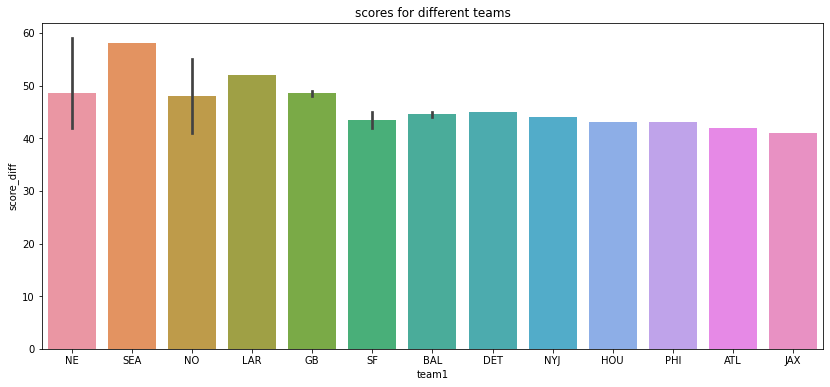

In [21]:
plt.figure(figsize = (14,6))
plt.title('scores for different teams')
sns.barplot(x = 'team1', y="score_diff", data=data.head(20))
locs, labels = plt.xticks()
plt.show()

NE has the greatest score difference. This means they win by the most amount of points. Still, I needed to figure out some way to interact the two teams. 

Also, below TEN looses by the most amount of points. 

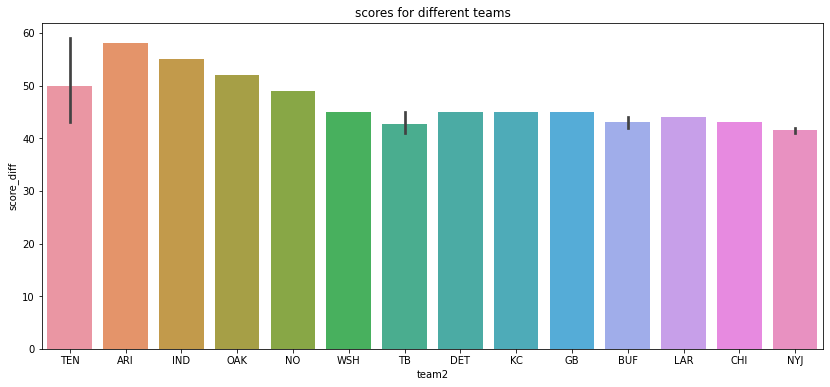

In [22]:
plt.figure(figsize = (14,6))
plt.title('scores for different teams')
sns.barplot(x = 'team2', y="score_diff", data=data.head(20))
locs, labels = plt.xticks()
plt.show()

# Feature Engineering 

Before I could continue, I needed some way to get an interaction between the two teams. I started by making a one hot encoding of team1 and team2. I then combined the encodings. To maintain a sense of who won and who lost, I made the team2 values negative, ie -1, and the team1 values positive. Then, if the score difference was negative, team2 won and if the score difference was positive, team1 won. 

In [23]:
from random import shuffle
data = data.sample(frac = 1)

In [24]:
team1_oh = pd.get_dummies(data['team1'], dtype=np.int64)
team2_oh = pd.get_dummies(data['team2'], dtype=np.int64)

In [25]:
team1_oh.head(5)

,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,NYG,NYJ,OAK,PHI,PIT,SEA,SF,TB,TEN,WSH
12954,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13206,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15459,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16075,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, I need to fit the teams together. 

In [26]:
teams_oh = team1_oh.sub(team2_oh)
teams_oh['score_diff'] = data['score_diff']
teams_oh['elo_diff'] = data['elo_diff']
teams_oh['date'] = data['date']
teams_oh.head(5)

,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,PHI,PIT,SEA,SF,TB,TEN,WSH,score_diff,elo_diff,date
12954,0,-1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,114.856000,2006-11-19
13206,0,0,1,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,-14,78.454000,2007-11-11
15459,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,7,228.311337,2016-01-03
14659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,18,137.787000,2012-12-30
16075,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,10,26.205895,2018-10-07


If the row has a 1, it was team1 and if the row has a -1, then it was team2. 

If the score is positive, then team1 won, and if the score was negative then team2 won. 

Encoding this way ensures I can know which team won and which team lost. 

Later in the project, I realized I needed to predict the scores of each team, not their difference. So I made the data table `scores` to be able to predict the score of the teams. 

In [27]:
scores = data[['score1', 'score2']]
scores.head()

,score1,score2
12954,24,10
13206,7,21
15459,27,20
14659,38,20
16075,27,17


# Regression 

Regression is useful to determine the relationship between independent valiables (features) and dependent variables (target values). 

In this problem, I tasked to predict the scores based on features. That is, the score is a function of the teams playing, and the elo predictions. 

## Linear Regression 

I used https://www.geeksforgeeks.org/linear-regression-python-implementation/ for help in implementing linear regression. 

This was my first attempt at regression. I tried to fit the data to predict the score difference. The coefficients of the regression were the rating of each time. If the team was a good, then they had a high positive rating. If the team was loosing, then the had a high negative rating. 

From the faceting before, TEN should have a low negative rating and NE should have a high positive rating. This is true below.  

In [28]:
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import Ridge, LinearRegression
import matplotlib.pyplot as plt

In [29]:
data_train = teams_oh
data_train = data_train.dropna(axis='columns')
data_train.head(5)

,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,PHI,PIT,SEA,SF,TB,TEN,WSH,score_diff,elo_diff,date
12954,0,-1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14,114.856000,2006-11-19
13206,0,0,1,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,-14,78.454000,2007-11-11
15459,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,7,228.311337,2016-01-03
14659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,18,137.787000,2012-12-30
16075,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,10,26.205895,2018-10-07


In [30]:
# defining feature matrix(X) and response vector(y) 
X = data_train.drop(['score_diff'], axis=1)
X = data_train.drop(['date'], axis=1)
#X = np.array(data.elo1).reshape(-1, 1)
y = data_train['score_diff']

In [31]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
lr = Ridge(alpha=0.001)
lr.fit(X_train, y_train)

Ridge(alpha=0.001)

In [33]:
df_ratings = pd.DataFrame(data={'team': X.columns, 'rating': lr.coef_})
df_ratings

,team,rating
0,ARI,-2.532983e-09
1,ATL,1.041983e-09
2,BAL,4.207294e-09
3,BUF,-2.992732e-09
4,CAR,4.624595e-10
5,CHI,2.845380e-09
6,CIN,-1.355059e-09
7,CLE,-2.302405e-09
8,DAL,2.169938e-09
9,DEN,-9.807869e-10


In [34]:
print('Score: \n', lr.score(X_test, y_test))

Score: 
 1.0


As found here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

The score is the R^2 coefficent for this fit. A model is "good" when the R^2 value is close to 1. A score of exactly 1 means the model is overfit. It's not a good representation of the data. 

The graph below showing the residual errors also proves this is not a good model. 

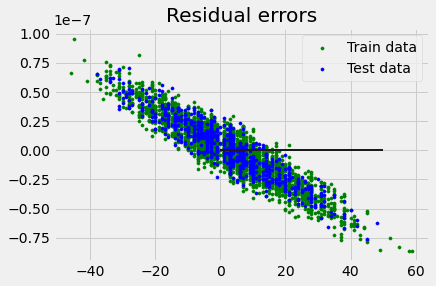

In [35]:
plt.style.use('fivethirtyeight')
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
## plotting legend 
plt.legend(loc = 'upper right') 
## plot title 
plt.title("Residual errors")  
## function to show plot 
plt.show() 

It is overfit. 

## Random Forest 

I tried again with Random Forest Regression. This time, instead of predicting the score difference, I predicted the scores of each team using the `scores` data set. 

Here is where I got tips to do it https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f

In [36]:
#X = teams_oh.drop(['score_diff'], axis=1)
X = teams_oh.drop(['date'], axis=1)
y = scores

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
X_train

,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,OAK,PHI,PIT,SEA,SF,TB,TEN,WSH,score_diff,elo_diff
15729,0,0,0,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,13,-90.945651
15712,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,21,84.793225
14405,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,-7,125.441000
13614,0,0,0,0,1,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,-28,-74.013000
15517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,21,66.198425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15683,0,0,0,0,0,0,1,0,0,0,...,0,0,-1,0,0,0,0,0,-4,-86.545743
13768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29,247.249000
13201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,-153.999000
15510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,-2,40.148062


Number of estimators is equal to the number of trees. 

In [39]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [40]:
pred = regressor.predict(X_test)

In [41]:
print(metrics.r2_score(y_test, pred))

0.9058527703721649


This model has an R^2 value closer to 1. The value is 0.82. I am getting closer! 

In [42]:
from sklearn.ensemble import RandomForestRegressor 
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor1.fit(X, y)
pred1 = regressor1.predict(X_test)
print(metrics.r2_score(y_test, pred1))

0.928080229287205


It seems that more trees provide a better value for R^2. 

In [43]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X, y)
pred = regressor.predict(X_test)
print(metrics.r2_score(y_test, pred))

0.9310127291918824


I needed to do cross-validation to test if the model was a good fit. 

I learned how to do cross validation here: https://jamesrledoux.com/code/k_fold_cross_validation

In [44]:
from sklearn.model_selection import cross_validate
cv = cross_validate(regressor1, X_test, y_test, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.52270444 0.39376462 0.41070127 0.32560158 0.42161389]
0.414877160534797


So, I see that this is not a good model at all. Ideally, you would want teh values close to 0.99 to get an accurate fit of the data. Nevertheless, I proceeded with this choice to predict scores. 

# Predicting Scores

Now that I have the test data, I used the model to predict the scores between some teams. 

I first turned the data into a dataframe. 

In [45]:
pred_scores = pd.DataFrame({'predscore_1': pred1[:, 0], 'predscore_2': pred1[:, 1]})
pred_scores

,predscore_1,predscore_2
0,18.19,29.28
1,22.61,16.59
2,27.27,14.05
3,23.84,29.78
4,40.96,9.16
...,...,...
743,28.53,10.32
744,24.86,10.90
745,30.57,27.59
746,21.56,29.39


In [46]:
X_test['team1']=''
X_test['team2']=''

<ipython-input-46-aace447a7dd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['team1']=''
<ipython-input-46-aace447a7dd7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['team2']=''


I readded which team is which. 

In [47]:
for col_name in X_test.columns:
    #X_test.loc[X_test[col_name]==1,'team1']= X_test['team1']+' '+col_name
    X_test.loc[X_test[col_name]==1,'team1']= col_name
    X_test.loc[X_test[col_name]==-1,'team2']= col_name
     
X_test = X_test.reset_index()
X_test = X_test.drop(columns='index')
X_test

/Users/annarosefritz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,PIT,SEA,SF,TB,TEN,WSH,score_diff,elo_diff,team1,team2
0,1,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,-11,-31.646891,ARI,DAL
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,6,68.641000,TEN,JAX
2,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,13,-65.287000,NYG,CAR
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,-6,-49.732000,PIT,GB
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,32,63.115000,MIN,DET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,1,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,18,9.831000,BAL,CLE
744,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,14,-76.314334,SEA,PHI
745,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,3,-200.607000,LAR,SEA
746,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,-8,-108.414000,TEN,CIN


In [48]:
df_pred_scores = X_test[['team1','team2']]
df_pred_scores = pd.merge(df_pred_scores, pred_scores, on=df_pred_scores.index)
df_pred_scores['home_away'] = list(zip(df_pred_scores['team1'], df_pred_scores['team2']))
df_pred_scores

,key_0,team1,team2,predscore_1,predscore_2,home_away
0,0,ARI,DAL,18.19,29.28,"(ARI, DAL)"
1,1,TEN,JAX,22.61,16.59,"(TEN, JAX)"
2,2,NYG,CAR,27.27,14.05,"(NYG, CAR)"
3,3,PIT,GB,23.84,29.78,"(PIT, GB)"
4,4,MIN,DET,40.96,9.16,"(MIN, DET)"
...,...,...,...,...,...,...
743,743,BAL,CLE,28.53,10.32,"(BAL, CLE)"
744,744,SEA,PHI,24.86,10.90,"(SEA, PHI)"
745,745,LAR,SEA,30.57,27.59,"(LAR, SEA)"
746,746,TEN,CIN,21.56,29.39,"(TEN, CIN)"


In [49]:
def predict (team1_in, team2_in): 

    df = df_pred_scores[(df_pred_scores['team1'] == team1_in) & (df_pred_scores['team2'] == team2_in)]

    print(team1_in, "score is predicted to be:", df[['predscore_1']])
    print(team2_in, "score is predicted to be:", df[['predscore_2']])
    

In [50]:
predict('PIT', 'KC')

PIT score is predicted to be:      predscore_1
351        40.83
KC score is predicted to be:      predscore_2
351        11.84


Here it gives you the predicted score of the game. 